# Proyecto: NPL Spam Classifier - URL's

Autor: Angel Reséndiz Plata<br>
Descripción: Detección de las URL's spam usando Natural Language Process y Machine Learning

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

## Cargar el dataset

In [19]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\Proyectos personales\Natural_language_process\NPL_Spam_Classifier2\data\url_spam.csv"
df = pd.read_csv(url)
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


## EDA

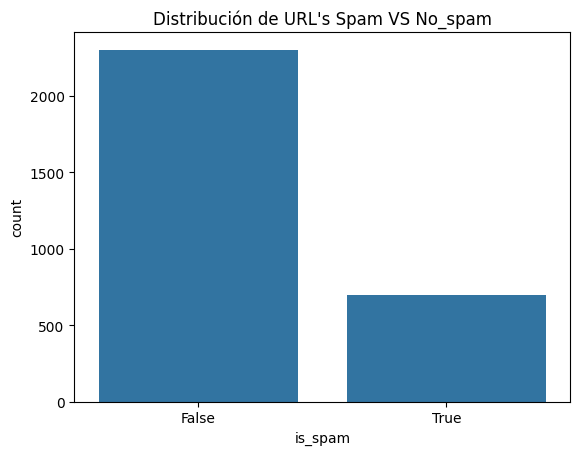

In [20]:
sns.countplot(x = "is_spam", data = df)
plt.title("Distribución de URL's Spam VS No_spam")
plt.show()

## Preprocesamiento

In [22]:
X = df["url"]
y = df["is_spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

## Modelos

### Logistic Regression

In [23]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_vect, y_train)
y_pred_lr = lr.predict(X_test_vect)

### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train_vect, y_train)
y_pred_rf = rf.predict(X_test_vect)

### XGBoost

In [28]:
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
xgb_model.fit(X_train_vect, y_train)
y_pred_xgb = xgb_model.predict(X_test_vect)

c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Comparación entre modelos

In [30]:
results = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Precisión": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

print(results)

                Modelo  Precisión
0  Logistic Regression   0.938333
1        Random Forest   0.948333
2              XGBoost   0.916667


## Guardar los modelos

In [34]:
import os

# Craer la carpeta
os.makedirs("outputs", exist_ok = True)

In [35]:
results.to_csv("outputs/results_table.csv", index = False)